DataFrame Hasil Perhitungan:
   tahun skenario  pendapatan  beban_operasional  penyusutan  \
0   2020  Optimis  1000000000          600000000    50000000   
1   2021   Normal  1200000000          650000000    55000000   
2   2022  Pesimis  1100000000          620000000    52000000   
3   2023  Optimis  1300000000          700000000    60000000   
4   2024   Normal  1250000000          680000000    58000000   
5   2025  Optimis  1400000000          720000000    65000000   

   laba_sebelum_pajak  laba_bersih  
0           350000000    350000000  
1           495000000    495000000  
2           428000000    428000000  
3           540000000    540000000  
4           512000000    512000000  
5           615000000    615000000  


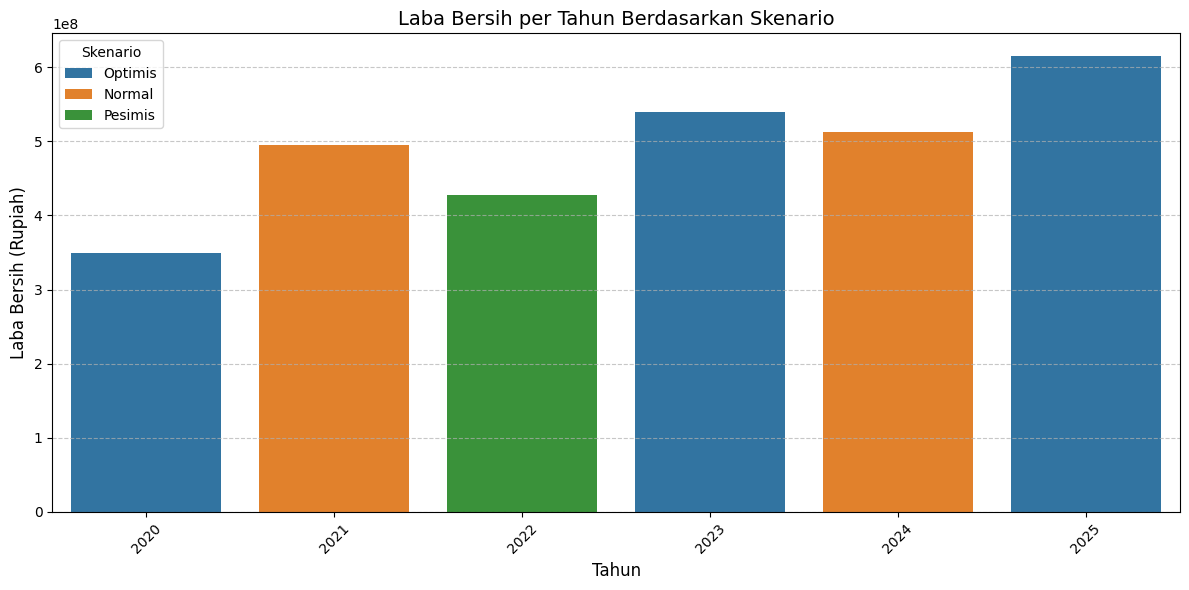

<Figure size 640x480 with 0 Axes>

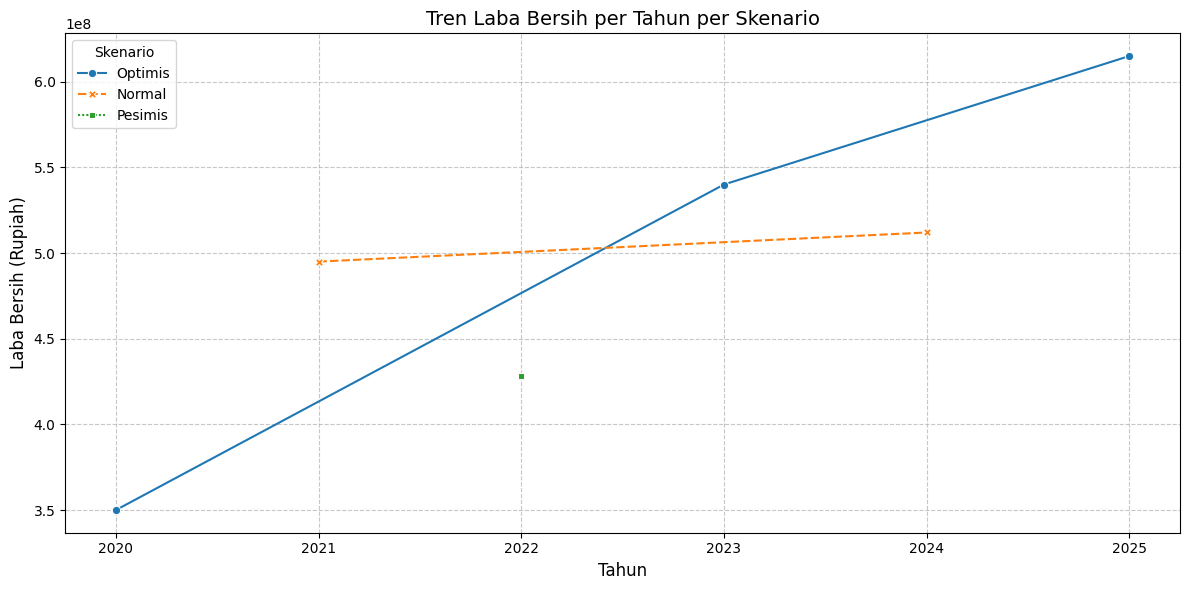

<Figure size 640x480 with 0 Axes>

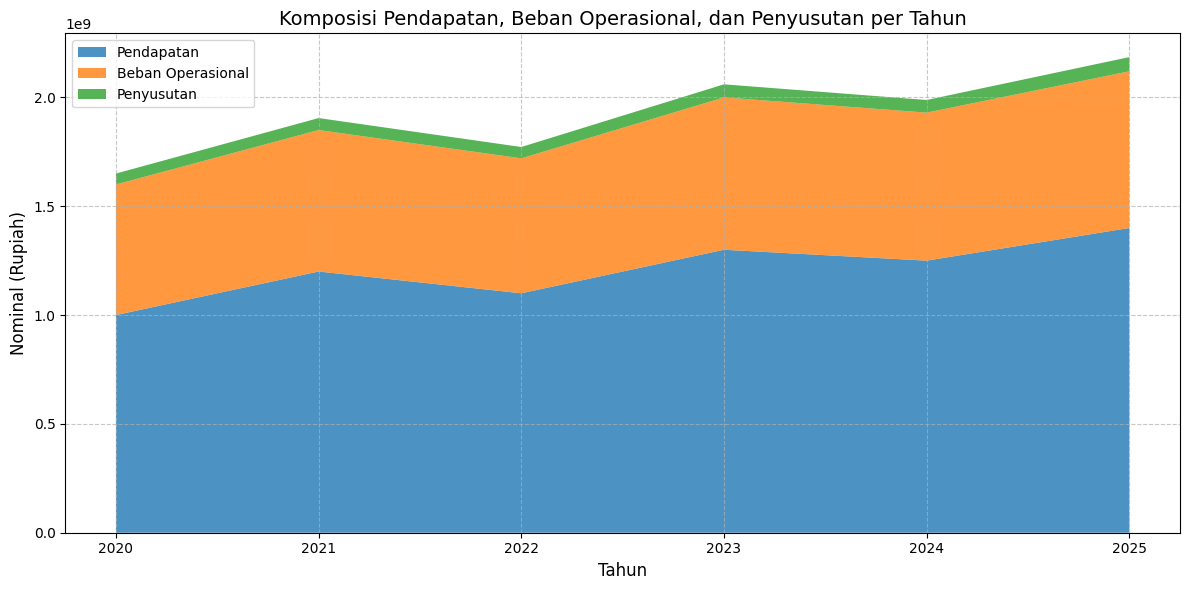

<Figure size 640x480 with 0 Axes>

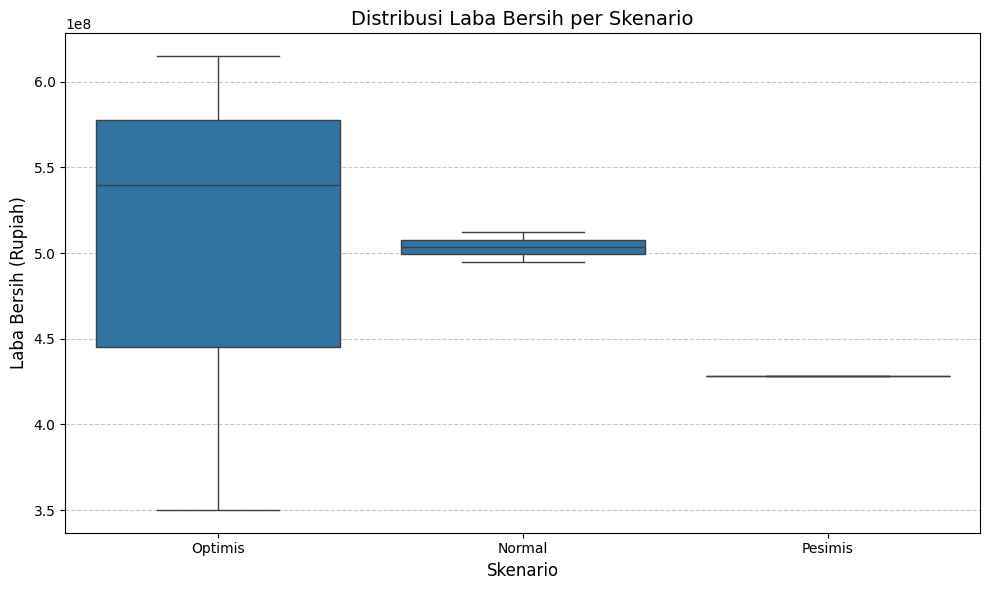

<Figure size 640x480 with 0 Axes>

In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO

# Data CSV dari artifact (disesuaikan untuk Google Colab)
transaksi_data = """tahun,pendapatan,beban_operasional,penyusutan,skenario
2020,1000000000,600000000,50000000,Optimis
2021,1200000000,650000000,55000000,Normal
2022,1100000000,620000000,52000000,Pesimis
2023,1300000000,700000000,60000000,Optimis
2024,1250000000,680000000,58000000,Normal
2025,1400000000,720000000,65000000,Optimis"""

kebijakan_fiskal_data = """tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir
2020,0.25,2018,2020
2021,0.22,2019,2021
2022,0.22,2020,2022
2023,0.20,2021,2023
2024,0.20,2022,2024
2025,0.20,2023,2025"""

# Membaca data dari string ke DataFrame
transaksi_df = pd.read_csv(StringIO(transaksi_data))
kebijakan_fiskal_df = pd.read_csv(StringIO(kebijakan_fiskal_data))

# Menggabungkan data transaksi dan kebijakan fiskal berdasarkan tahun
df = pd.merge(transaksi_df, kebijakan_fiskal_df, on='tahun', how='left')

# Menghitung apakah tahun tersebut dalam periode tax holiday
df['is_tax_holiday'] = df.apply(lambda x: x['tax_holiday_awal'] <= x['tahun'] <= x['tax_holiday_akhir'], axis=1)

# Menghitung laba sebelum pajak (pendapatan - beban operasional - penyusutan)
df['laba_sebelum_pajak'] = df['pendapatan'] - df['beban_operasional'] - df['penyusutan']

# Menghitung pajak (jika tidak dalam tax holiday)
df['pajak'] = df.apply(lambda x: x['laba_sebelum_pajak'] * x['tax_rate'] if not x['is_tax_holiday'] else 0, axis=1)

# Menghitung laba bersih (laba setelah pajak)
df['laba_bersih'] = df['laba_sebelum_pajak'] - df['pajak']

# Menampilkan DataFrame hasil perhitungan
print("DataFrame Hasil Perhitungan:")
print(df[['tahun', 'skenario', 'pendapatan', 'beban_operasional', 'penyusutan', 'laba_sebelum_pajak', 'laba_bersih']])

# Visualisasi 1: Grafik1: Bar Plot Laba
#Laba Bersih per Tahun
#Tahun Berdasarkan Skenario
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='laba_bersih', x='tahun', hue='skenario')
plt.title('Laba Bersih per Tahun Berdasarkan Skenario', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Laba Bersih (Rupiah)', fontsize=12)
plt.legend(title='Skenario')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('laba_bersih_per_tahun_barplot.png')


# Visualisasi 2: Grafik visualisasi 2: Line Plot Tren Laba Bersih per Skenario
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='laba_bersih', x='tahun', hue='skenario', style='skenario', markers=True)
plt.title('Tren Laba Bersih per Tahun per Skenario', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Laba Bersih (Rupiah)', fontsize=12)
plt.legend(title='Skenario')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['tahun'])
plt.tight_layout()
plt.show()
plt.savefig('tren_laba_bersih_lineplot.png')


# Visualisasi 3: Grafik Komposisi Pendapatan, Beban, dan Penyusutan
plt.figure(figsize=(12, 6))
plt.stackplot(df['tahun'], df['pendapatan'], df['beban_operasional'], df['penyusutan'],
              labels=['Pendapatan', 'Beban Operasional', 'Penyusutan'], alpha=0.8)
plt.title('Komposisi Pendapatan, Beban Operasional, dan Penyusutan per Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Nominal (Rupiah)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['tahun'])
plt.tight_layout()
plt.show()
plt.savefig('komposisi_pendapatan_beban_penyusutan_stackplot.png')


# Visualisasi 4: Box Plot Distribusi Laba Bersih per Skenario
plt.figure(figsize=(10, 6))
sns.boxplot(x='skenario', y='laba_bersih', data=df)
plt.title('Distribusi Laba Bersih per Skenario', fontsize=14)
plt.xlabel('Skenario', fontsize=12)
plt.ylabel('Laba Bersih (Rupiah)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('distribusi_laba_bersih_boxplot.png')

DataFrame Simulasi Depresiasi Garis Lurus:
    tahun aset_id   kategori  depresiasi_tahunan    nilai_buku skenario
0    2020    A001      Mesin        5.000000e+07  4.500000e+08  Optimis
1    2021    A001      Mesin        5.000000e+07  4.000000e+08   Normal
2    2022    A001      Mesin        5.000000e+07  3.500000e+08  Pesimis
3    2023    A001      Mesin        5.000000e+07  3.000000e+08  Optimis
4    2024    A001      Mesin        5.000000e+07  2.500000e+08   Normal
5    2025    A001      Mesin        5.000000e+07  2.000000e+08  Optimis
6    2020    A002  Kendaraan        6.000000e+07  2.400000e+08  Optimis
7    2021    A002  Kendaraan        6.000000e+07  1.800000e+08   Normal
8    2022    A002  Kendaraan        6.000000e+07  1.200000e+08  Pesimis
9    2023    A002  Kendaraan        6.000000e+07  6.000000e+07  Optimis
10   2024    A002  Kendaraan        6.000000e+07  0.000000e+00   Normal
11   2025    A002  Kendaraan        6.000000e+07  0.000000e+00  Optimis
12   2020    A003   B

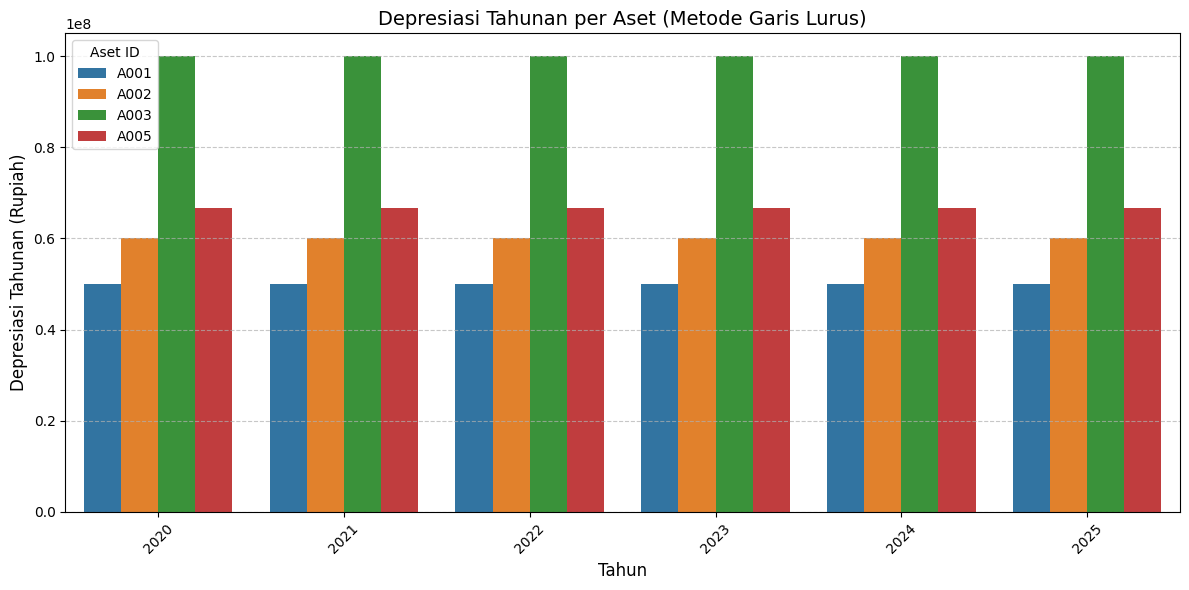

<Figure size 640x480 with 0 Axes>

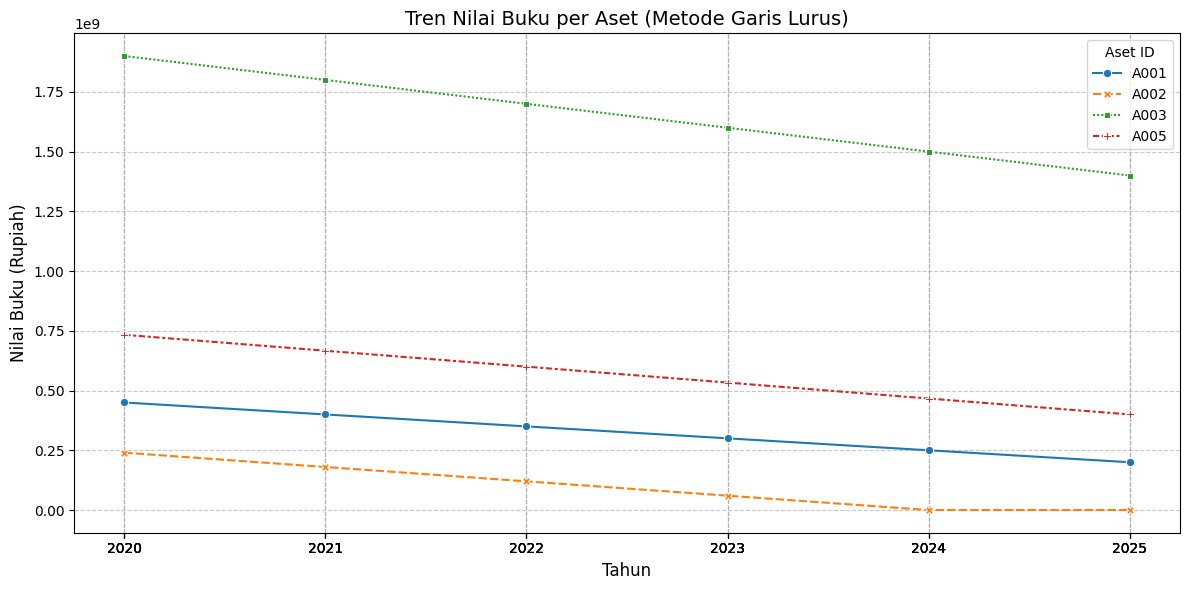

<Figure size 640x480 with 0 Axes>

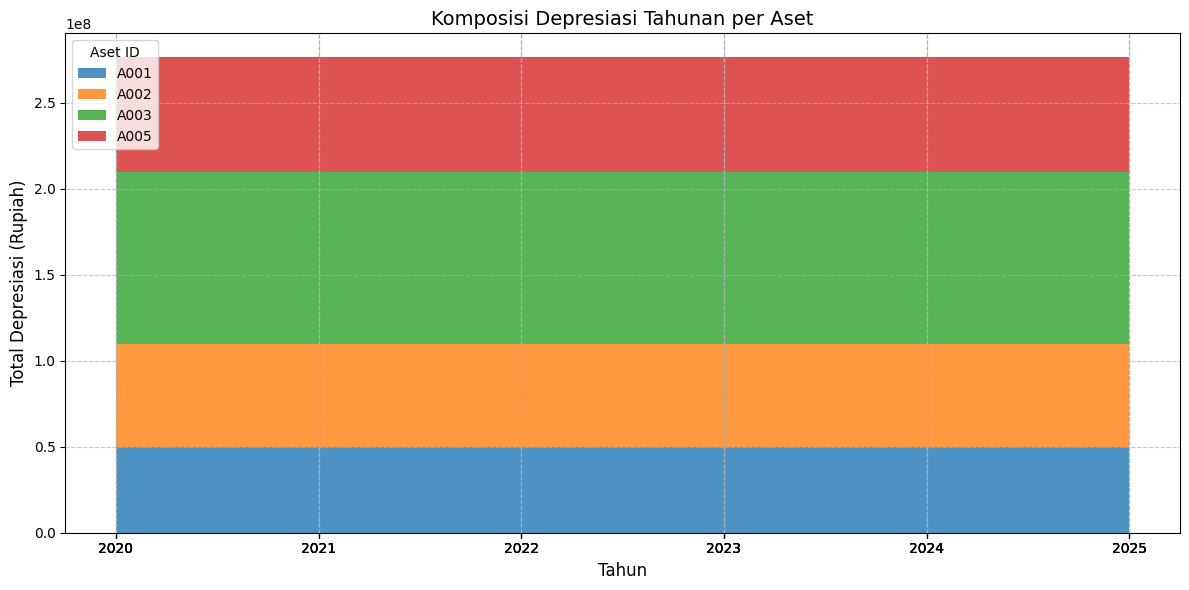

<Figure size 640x480 with 0 Axes>

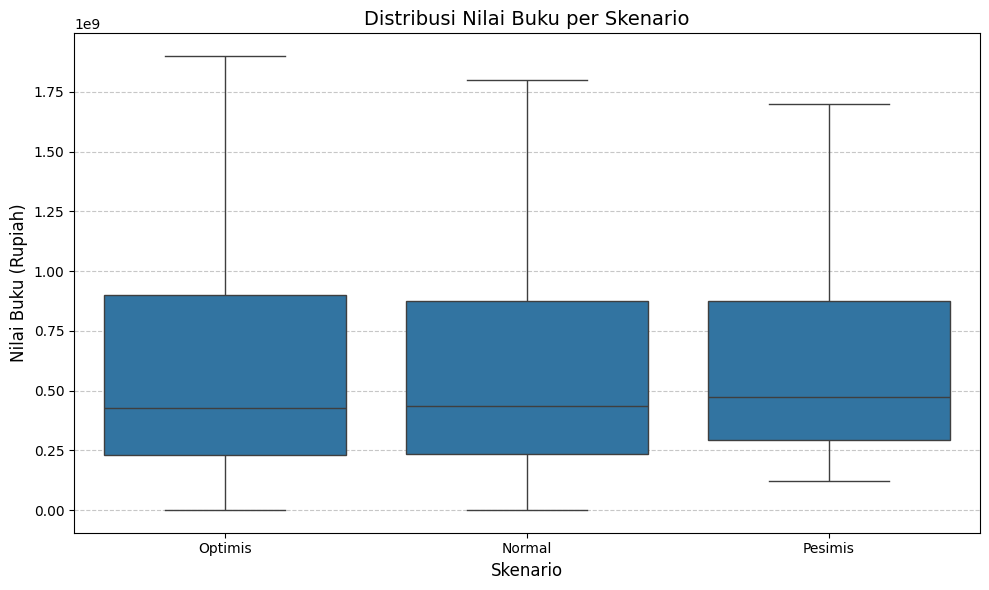

<Figure size 640x480 with 0 Axes>

In [6]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Data CSV dari artifact (disesuaikan untuk Google Colab)
transaksi_data = """tahun,pendapatan,beban_operasional,penyusutan,skenario
2020,1000000000,600000000,50000000,Optimis
2021,1200000000,650000000,55000000,Normal
2022,1100000000,620000000,52000000,Pesimis
2023,1300000000,700000000,60000000,Optimis
2024,1250000000,680000000,58000000,Normal
2025,1400000000,720000000,65000000,Optimis"""

aset_tetap_data = """aset_id,kategori,nilai_perolehan,umur_ekonomis,metode
A001,Mesin,500000000,10,Garis Lurus
A002,Kendaraan,300000000,5,Garis Lurus
A003,Bangunan,2000000000,20,Garis Lurus
A004,Peralatan,150000000,8,Saldo Menurun
A005,Mesin,800000000,12,Garis Lurus"""

# Membaca data ke DataFrame
transaksi_df = pd.read_csv(StringIO(transaksi_data))
aset_tetap_df = pd.read_csv(StringIO(aset_tetap_data))

# Filter aset dengan metode Garis Lurus
aset_garis_lurus = aset_tetap_df[aset_tetap_df['metode'] == 'Garis Lurus']

# Fungsi untuk menghitung depresiasi garis lurus
def hitung_depresiasi_garis_lurus(nilai_perolehan, umur_ekonomis):
    return nilai_perolehan / umur_ekonomis

# Menambahkan kolom depresiasi tahunan ke aset_garis_lurus
aset_garis_lurus['depresiasi_tahunan'] = aset_garis_lurus.apply(
    lambda x: hitung_depresiasi_garis_lurus(x['nilai_perolehan'], x['umur_ekonomis']), axis=1)

# Membuat simulasi depresiasi untuk setiap aset dari tahun 2020 hingga 2025
tahun_range = transaksi_df['tahun'].values
depresiasi_simulasi = []

for _, aset in aset_garis_lurus.iterrows():
    aset_id = aset['aset_id']
    kategori = aset['kategori']
    nilai_perolehan = aset['nilai_perolehan']
    umur_ekonomis = aset['umur_ekonomis']
    depresiasi_tahunan = aset['depresiasi_tahunan']

    # Asumsi aset mulai digunakan pada tahun 2020
    for tahun in tahun_range:
        # Hitung nilai buku (book value) untuk setiap tahun
        tahun_berjalan = tahun - 2020 + 1  # Hitung tahun ke-n sejak 2020
        if tahun_berjalan <= umur_ekonomis:
            nilai_buku = nilai_perolehan - (depresiasi_tahunan * tahun_berjalan)
            nilai_buku = max(0, nilai_buku)  # Nilai buku tidak boleh negatif
        else:
            nilai_buku = 0  # Jika umur ekonomis terlampaui, nilai buku = 0

        # Ambil skenario dari transaksi_df
        skenario = transaksi_df[transaksi_df['tahun'] == tahun]['skenario'].values[0]

        depresiasi_simulasi.append({
            'tahun': tahun,
            'aset_id': aset_id,
            'kategori': kategori,
            'depresiasi_tahunan': depresiasi_tahunan,
            'nilai_buku': nilai_buku,
            'skenario': skenario
        })

# Membuat DataFrame untuk simulasi depresiasi
depresiasi_df = pd.DataFrame(depresiasi_simulasi)

# Menampilkan DataFrame hasil simulasi
print("DataFrame Simulasi Depresiasi Garis Lurus:")
print(depresiasi_df)

# Visualisasi 1: Bar Plot Depresiasi Tahunan per Aset
plt.figure(figsize=(12, 6))
sns.barplot(data=depresiasi_df, x='tahun', y='depresiasi_tahunan', hue='aset_id')
plt.title('Depresiasi Tahunan per Aset (Metode Garis Lurus)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Depresiasi Tahunan (Rupiah)', fontsize=12)
plt.legend(title='Aset ID')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi 2: Line Plot Nilai Buku per Aset
plt.figure(figsize=(12, 6))
sns.lineplot(data=depresiasi_df, x='tahun', y='nilai_buku', hue='aset_id', style='aset_id', markers=True)
plt.title('Tren Nilai Buku per Aset (Metode Garis Lurus)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Nilai Buku (Rupiah)', fontsize=12)
plt.legend(title='Aset ID')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(depresiasi_df['tahun'])
plt.tight_layout()
plt.show()

# Visualisasi 3: Stack Plot Total Depresiasi per Tahun
pivot_df = depresiasi_df.pivot_table(index='tahun', columns='aset_id', values='depresiasi_tahunan', aggfunc='sum')
plt.figure(figsize=(12, 6))
plt.stackplot(pivot_df.index, pivot_df.values, labels=pivot_df.columns, alpha=0.8)
plt.title('Komposisi Depresiasi Tahunan per Aset', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Depresiasi (Rupiah)', fontsize=12)
plt.legend(title='Aset ID', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(depresiasi_df['tahun'])
plt.tight_layout()
plt.show()

# Visualisasi 4: Box Plot Distribusi Nilai Buku per Skenario
plt.figure(figsize=(10, 6))
sns.boxplot(x='skenario', y='nilai_buku', data=depresiasi_df)
plt.title('Distribusi Nilai Buku per Skenario', fontsize=14)
plt.xlabel('Skenario', fontsize=12)
plt.ylabel('Nilai Buku (Rupiah)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

DataFrame Simulasi Depresiasi Saldo Menurun:
   tahun aset_id   kategori  depresiasi_tahunan    nilai_buku skenario
0   2020    A004  Peralatan        3.750000e+07  1.125000e+08  Optimis
1   2021    A004  Peralatan        2.812500e+07  8.437500e+07   Normal
2   2022    A004  Peralatan        2.109375e+07  6.328125e+07  Pesimis
3   2023    A004  Peralatan        1.582031e+07  4.746094e+07  Optimis
4   2024    A004  Peralatan        1.186523e+07  3.559570e+07   Normal
5   2025    A004  Peralatan        8.898926e+06  2.669678e+07  Optimis


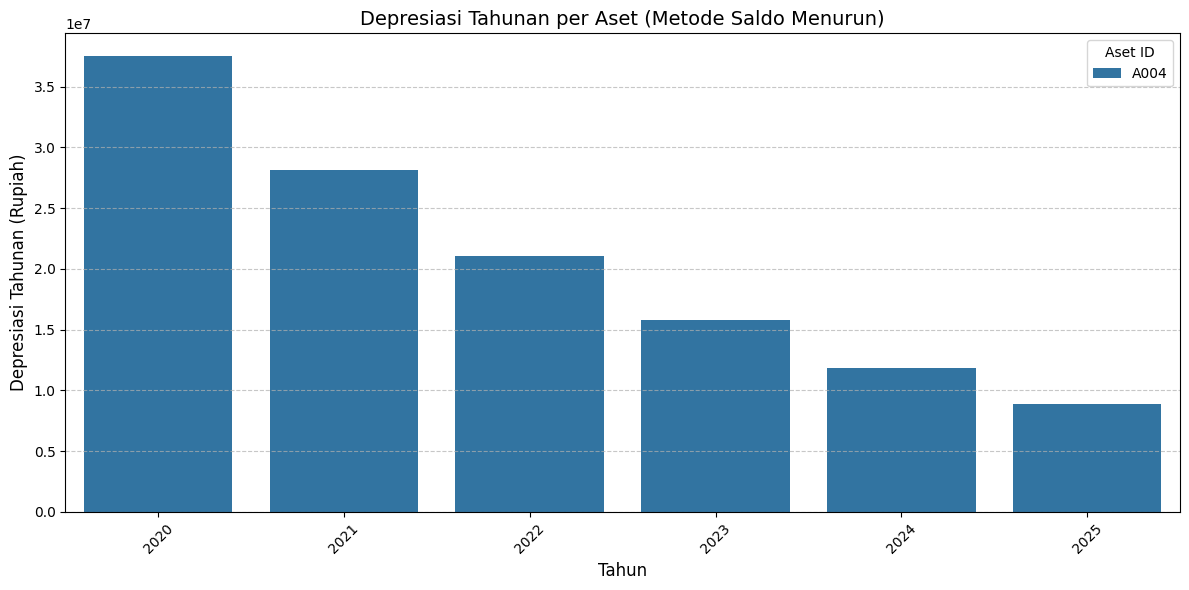

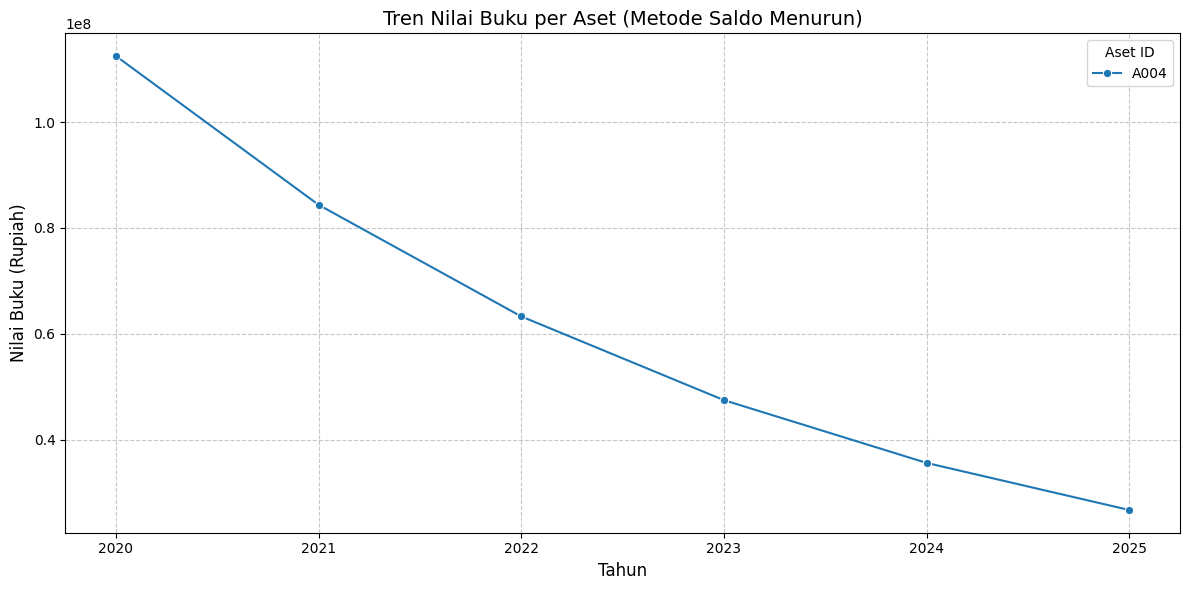

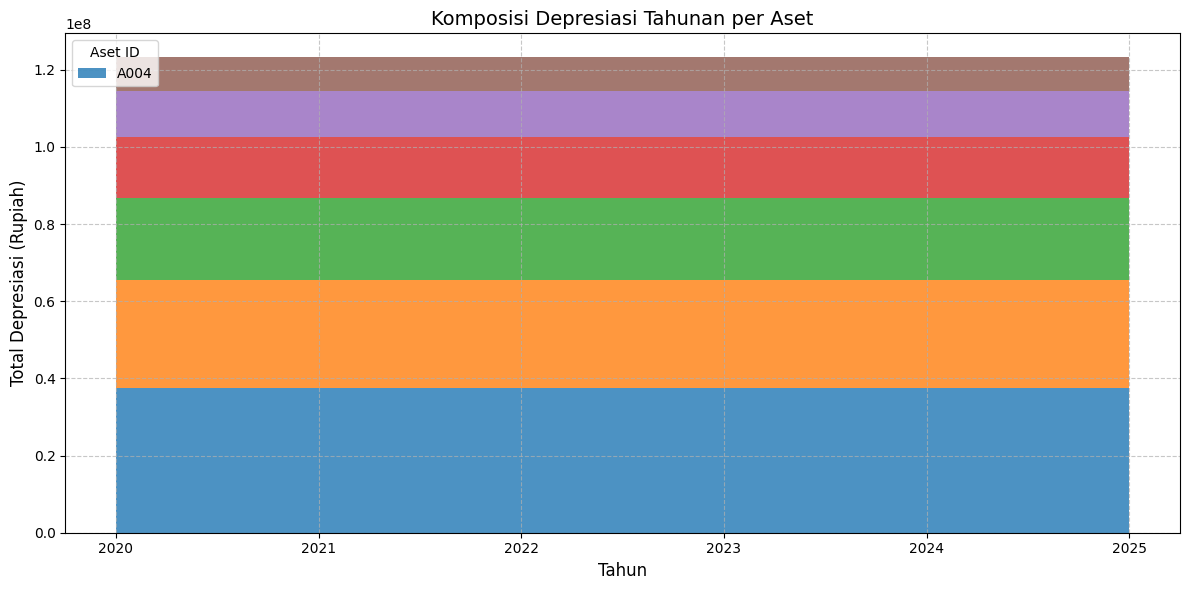

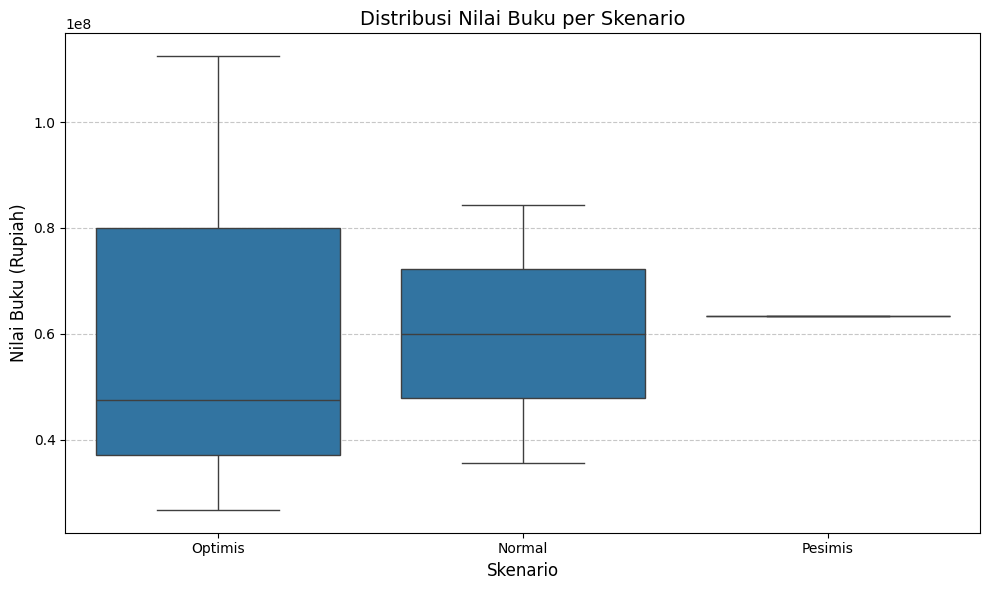

In [7]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Data CSV dari artifact (disesuaikan untuk Google Colab)
transaksi_data = """tahun,pendapatan,beban_operasional,penyusutan,skenario
2020,1000000000,600000000,50000000,Optimis
2021,1200000000,650000000,55000000,Normal
2022,1100000000,620000000,52000000,Pesimis
2023,1300000000,700000000,60000000,Optimis
2024,1250000000,680000000,58000000,Normal
2025,1400000000,720000000,65000000,Optimis"""

aset_tetap_data = """aset_id,kategori,nilai_perolehan,umur_ekonomis,metode
A001,Mesin,500000000,10,Garis Lurus
A002,Kendaraan,300000000,5,Garis Lurus
A003,Bangunan,2000000000,20,Garis Lurus
A004,Peralatan,150000000,8,Saldo Menurun
A005,Mesin,800000000,12,Garis Lurus"""

# Membaca data ke DataFrame
transaksi_df = pd.read_csv(StringIO(transaksi_data))
aset_tetap_df = pd.read_csv(StringIO(aset_tetap_data))

# Filter aset dengan metode Saldo Menurun
aset_saldo_menurun = aset_tetap_df[aset_tetap_df['metode'] == 'Saldo Menurun']

# Fungsi untuk menghitung depresiasi saldo menurun (misal: 2x lipat garis lurus)
def hitung_depresiasi_saldo_menurun(nilai_buku, umur_ekonomis):
    rate = 2 / umur_ekonomis  # Tingkat depresiasi (double declining balance)
    return nilai_buku * rate

# Membuat simulasi depresiasi untuk setiap aset dari tahun 2020 hingga 2025
tahun_range = transaksi_df['tahun'].values
depresiasi_simulasi = []

for _, aset in aset_saldo_menurun.iterrows():
    aset_id = aset['aset_id']
    kategori = aset['kategori']
    nilai_perolehan = aset['nilai_perolehan']
    umur_ekonomis = aset['umur_ekonomis']

    # Inisialisasi nilai buku awal
    nilai_buku = nilai_perolehan

    # Asumsi aset mulai digunakan pada tahun 2020
    for tahun in tahun_range:
        # Hitung depresiasi tahunan
        depresiasi_tahunan = hitung_depresiasi_saldo_menurun(nilai_buku, umur_ekonomis)
        nilai_buku = nilai_buku - depresiasi_tahunan
        nilai_buku = max(0, nilai_buku)  # Nilai buku tidak boleh negatif

        # Ambil skenario dari transaksi_df
        skenario = transaksi_df[transaksi_df['tahun'] == tahun]['skenario'].values[0]

        depresiasi_simulasi.append({
            'tahun': tahun,
            'aset_id': aset_id,
            'kategori': kategori,
            'depresiasi_tahunan': depresiasi_tahunan,
            'nilai_buku': nilai_buku,
            'skenario': skenario
        })

# Membuat DataFrame untuk simulasi depresiasi
depresiasi_df = pd.DataFrame(depresiasi_simulasi)

# Menampilkan DataFrame hasil simulasi
print("DataFrame Simulasi Depresiasi Saldo Menurun:")
print(depresiasi_df)

# Visualisasi 1: Bar Plot Depresiasi Tahunan per Aset
plt.figure(figsize=(12, 6))
sns.barplot(data=depresiasi_df, x='tahun', y='depresiasi_tahunan', hue='aset_id')
plt.title('Depresiasi Tahunan per Aset (Metode Saldo Menurun)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Depresiasi Tahunan (Rupiah)', fontsize=12)
plt.legend(title='Aset ID')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi 2: Line Plot Nilai Buku per Aset
plt.figure(figsize=(12, 6))
sns.lineplot(data=depresiasi_df, x='tahun', y='nilai_buku', hue='aset_id', style='aset_id', markers=True)
plt.title('Tren Nilai Buku per Aset (Metode Saldo Menurun)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Nilai Buku (Rupiah)', fontsize=12)
plt.legend(title='Aset ID')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(depresiasi_df['tahun'])
plt.tight_layout()
plt.show()

# Visualisasi 3: Stack Plot Total Depresiasi per Tahun
pivot_df = depresiasi_df.pivot_table(index='tahun', columns='aset_id', values='depresiasi_tahunan', aggfunc='sum')
plt.figure(figsize=(12, 6))
plt.stackplot(pivot_df.index, pivot_df.values, labels=pivot_df.columns, alpha=0.8)
plt.title('Komposisi Depresiasi Tahunan per Aset', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Depresiasi (Rupiah)', fontsize=12)
plt.legend(title='Aset ID', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(depresiasi_df['tahun'])
plt.tight_layout()
plt.show()

# Visualisasi 4: Box Plot Distribusi Nilai Buku per Skenario
plt.figure(figsize=(10, 6))
sns.boxplot(x='skenario', y='nilai_buku', data=depresiasi_df)
plt.title('Distribusi Nilai Buku per Skenario', fontsize=14)
plt.xlabel('Skenario', fontsize=12)
plt.ylabel('Nilai Buku (Rupiah)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

DataFrame Simulasi Tax Holiday:
   tahun skenario  laba_sebelum_pajak  pajak_dengan_tax_holiday  \
0   2020  Optimis           350000000                         0   
1   2021   Normal           495000000                         0   
2   2022  Pesimis           428000000                         0   
3   2023  Optimis           540000000                         0   
4   2024   Normal           512000000                         0   
5   2025  Optimis           615000000                         0   

   pajak_tanpa_tax_holiday  laba_bersih_dengan_tax_holiday  \
0               87500000.0                       350000000   
1              108900000.0                       495000000   
2               94160000.0                       428000000   
3              108000000.0                       540000000   
4              102400000.0                       512000000   
5              123000000.0                       615000000   

   laba_bersih_tanpa_tax_holiday  
0                    2625000

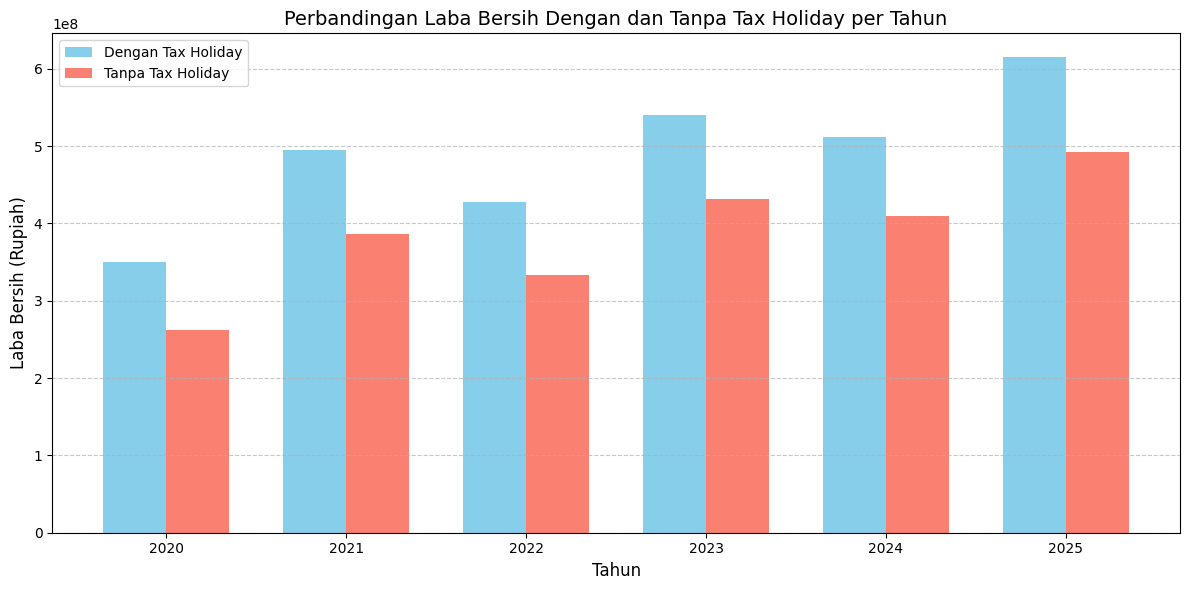

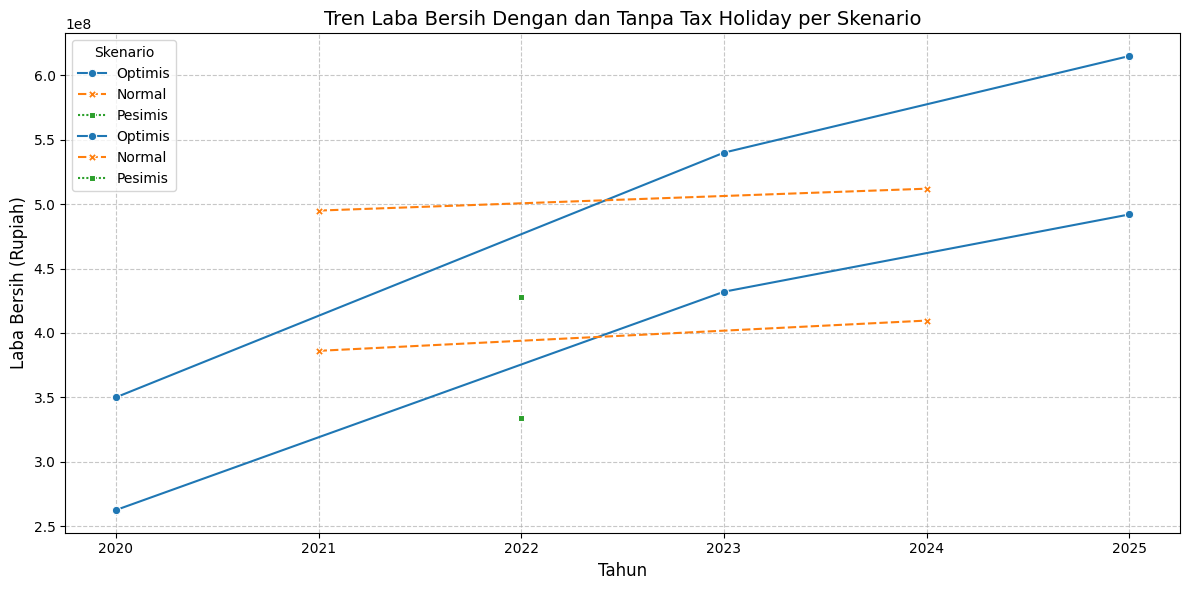

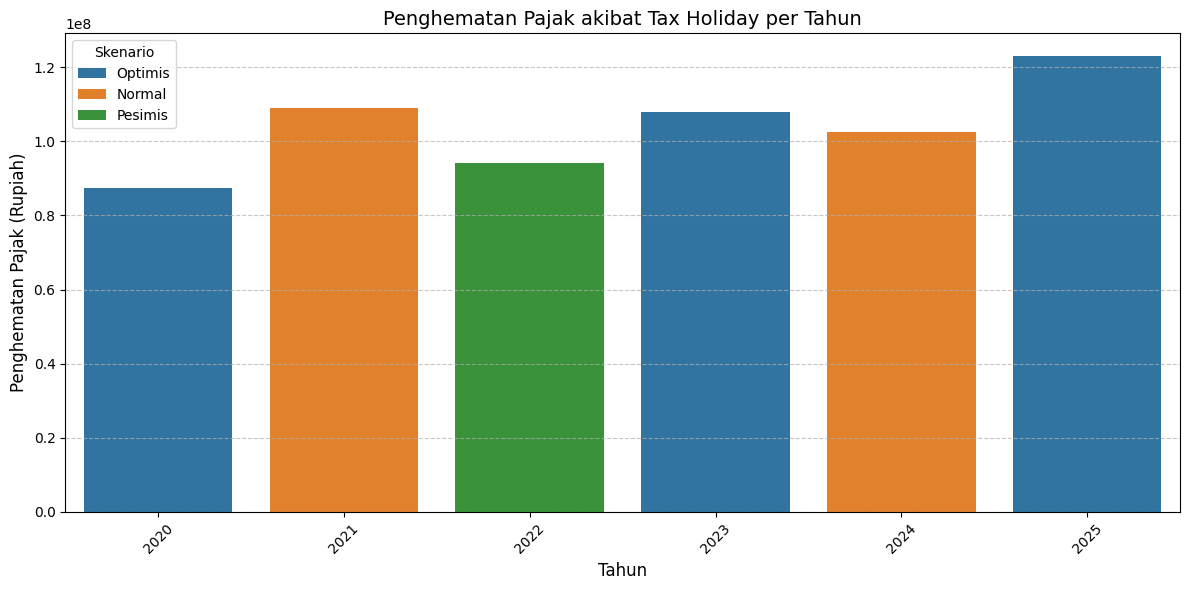

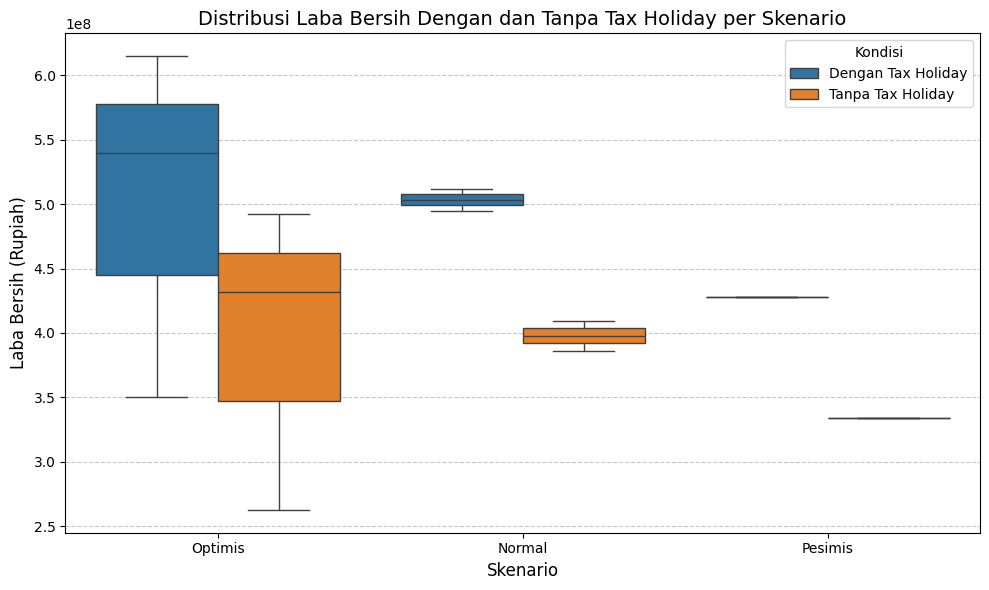

In [9]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Data CSV dari artifact (disesuaikan untuk Google Colab)
transaksi_data = """tahun,pendapatan,beban_operasional,penyusutan,skenario
2020,1000000000,600000000,50000000,Optimis
2021,1200000000,650000000,55000000,Normal
2022,1100000000,620000000,52000000,Pesimis
2023,1300000000,700000000,60000000,Optimis
2024,1250000000,680000000,58000000,Normal
2025,1400000000,720000000,65000000,Optimis"""

kebijakan_fiskal_data = """tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir
2020,0.25,2018,2020
2021,0.22,2019,2021
2022,0.22,2020,2022
2023,0.20,2021,2023
2024,0.20,2022,2024
2025,0.20,2023,2025"""

# Membaca data ke DataFrame
transaksi_df = pd.read_csv(StringIO(transaksi_data))
kebijakan_fiskal_df = pd.read_csv(StringIO(kebijakan_fiskal_data))

# Menggabungkan data transaksi dan kebijakan fiskal berdasarkan tahun
df = pd.merge(transaksi_df, kebijakan_fiskal_df, on='tahun', how='left')

# Menghitung apakah tahun tersebut dalam periode tax holiday
df['is_tax_holiday'] = df.apply(lambda x: x['tax_holiday_awal'] <= x['tahun'] <= x['tax_holiday_akhir'], axis=1)

# Menghitung laba sebelum pajak (pendapatan - beban operasional - penyusutan)
df['laba_sebelum_pajak'] = df['pendapatan'] - df['beban_operasional'] - df['penyusutan']

# Menghitung pajak dengan tax holiday
df['pajak_dengan_tax_holiday'] = df.apply(lambda x: x['laba_sebelum_pajak'] * x['tax_rate'] if not x['is_tax_holiday'] else 0, axis=1)

# Menghitung pajak tanpa tax holiday (pajak normal)
df['pajak_tanpa_tax_holiday'] = df['laba_sebelum_pajak'] * df['tax_rate']

# Menghitung laba bersih dengan dan tanpa tax holiday
df['laba_bersih_dengan_tax_holiday'] = df['laba_sebelum_pajak'] - df['pajak_dengan_tax_holiday']
df['laba_bersih_tanpa_tax_holiday'] = df['laba_sebelum_pajak'] - df['pajak_tanpa_tax_holiday']

# Menampilkan DataFrame hasil simulasi
print("DataFrame Simulasi Tax Holiday:")
print(df[['tahun', 'skenario', 'laba_sebelum_pajak', 'pajak_dengan_tax_holiday', 'pajak_tanpa_tax_holiday',
          'laba_bersih_dengan_tax_holiday', 'laba_bersih_tanpa_tax_holiday']])

# Visualisasi 1: Bar Plot Perbandingan Laba Bersih Dengan dan Tanpa Tax Holiday
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df['tahun']))
plt.bar([i - bar_width/2 for i in x], df['laba_bersih_dengan_tax_holiday'], bar_width, label='Dengan Tax Holiday', color='skyblue')
plt.bar([i + bar_width/2 for i in x], df['laba_bersih_tanpa_tax_holiday'], bar_width, label='Tanpa Tax Holiday', color='salmon')
plt.title('Perbandingan Laba Bersih Dengan dan Tanpa Tax Holiday per Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Laba Bersih (Rupiah)', fontsize=12)
plt.xticks(x, df['tahun'])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('perbandingan_laba_bersih_barplot.png')

# Visualisasi 2: Line Plot Tren Laba Bersih per Skenario
plt.figure(figsize=(12, 6))
sns.lineplot(x='tahun', y='laba_bersih_dengan_tax_holiday', hue='skenario', style='skenario', markers=True,
             data=df)
sns.lineplot(x='tahun', y='laba_bersih_tanpa_tax_holiday', hue='skenario', style='skenario', markers=True,
             data=df, linestyle='--')
plt.title('Tren Laba Bersih Dengan dan Tanpa Tax Holiday per Skenario', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Laba Bersih (Rupiah)', fontsize=12)
plt.legend(title='Skenario')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['tahun'])
plt.tight_layout()
plt.show()
plt.savefig('tren_laba_bersih_tax_holiday_lineplot.png')

# Visualisasi 3: Bar Plot Penghematan Pajak akibat Tax Holiday
df['penghematan_pajak'] = df['pajak_tanpa_tax_holiday'] - df['pajak_dengan_tax_holiday']
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='tahun', y='penghematan_pajak', hue='skenario')
plt.title('Penghematan Pajak akibat Tax Holiday per Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Penghematan Pajak (Rupiah)', fontsize=12)
plt.legend(title='Skenario')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('penghematan_pajak_barplot.png')

# Visualisasi 4: Box Plot Distribusi Laba Bersih per Skenario
plt.figure(figsize=(10, 6))
laba_melted = pd.melt(df, id_vars=['skenario'], value_vars=['laba_bersih_dengan_tax_holiday', 'laba_bersih_tanpa_tax_holiday'],
                      var_name='Kondisi', value_name='Laba Bersih')
laba_melted['Kondisi'] = laba_melted['Kondisi'].replace({
    'laba_bersih_dengan_tax_holiday': 'Dengan Tax Holiday',
    'laba_bersih_tanpa_tax_holiday': 'Tanpa Tax Holiday'
})
sns.boxplot(x='skenario', y='Laba Bersih', hue='Kondisi', data=laba_melted)
plt.title('Distribusi Laba Bersih Dengan dan Tanpa Tax Holiday per Skenario', fontsize=14)
plt.xlabel('Skenario', fontsize=12)
plt.ylabel('Laba Bersih (Rupiah)', fontsize=12)
plt.legend(title='Kondisi')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('distribusi_laba_bersih_boxplot.png')